In [1]:
# Import pandas with alias pd
import pandas as pd
# Import nympy with alias np
import numpy as np
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

Import the avacados dataset.

In [2]:
avocados = pd.read_pickle('../datasets/avoplotto.pkl')

# Visualizing Your Data

### Which size avacados are most popular?

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


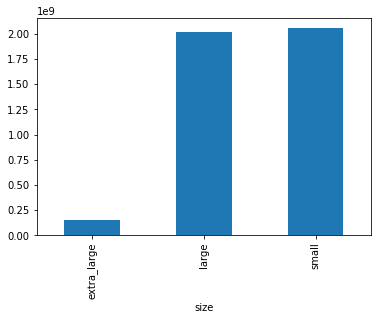

In [3]:
# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

It appears that the small avocados were the most-purchased size, but large avocados were a close second.

### What is the change in avacado sales over time?

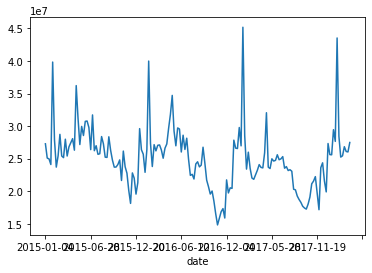

In [4]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

It looks like the avocados sales spike around the same time each year.

### What does the avacado supply and demand look like?

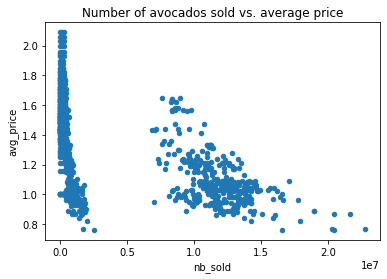

In [5]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold",
              y="avg_price",
              title="Number of avocados sold vs. average price",
              kind="scatter"
             )

# Show the plot
plt.show()

The plot shows when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can only tell that sales and price are correlated.

### What is the price of conventional vs. organic avocados?

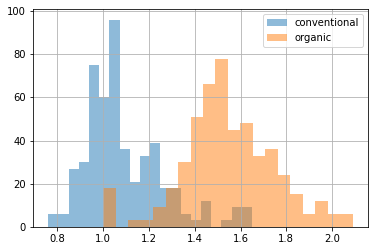

In [6]:
# Histogram of conventional avg_price with 0.5 transparency and 20 bins.
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price with 0.5 transparency and 20 bins.
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

We can see that on average, organic avocados are more expensive than conventional ones, but their price distributions have some overlap.

# Missing Values

|Method|Description|Link to Documentation|
|--------|--------|--------|
|```df.isna()```|Detect missing values for an array-like object.|[.isna Pandas Documentaiton](https://pandas.pydata.org/docs/reference/api/pandas.isna.html)|
|```df.any()```|Return whether any element is True, potentially over an axis.|[.any Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)|

In [7]:
# Import avocados data from folder.
avocados_2016 = pd.read_csv("../datasets/avocados_2016.csv")

### Finding Missing Values

|Method|Description|Link to Documentation|
|--------|--------|--------|
|```df.isna()```|Detect missing values for an array-like object.|[.isna Pandas Documentaiton](https://pandas.pydata.org/docs/reference/api/pandas.isna.html)|
|```df.any()```|Return whether any element is True, potentially over an axis.|[.any Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)|

    Unnamed: 0   date  avg_price  total_sold  small_sold  large_sold  xl_sold  \
0        False  False      False       False       False       False    False   
1        False  False      False       False       False       False    False   
2        False  False      False       False       False        True    False   
3        False  False      False       False       False       False    False   
4        False  False      False       False       False       False     True   
5        False  False      False       False        True       False    False   
6        False  False      False       False       False       False    False   
7        False  False      False       False       False        True    False   
8        False  False      False       False       False       False    False   
9        False  False      False       False       False       False    False   
10       False  False      False       False       False        True    False   
11       False  False      F

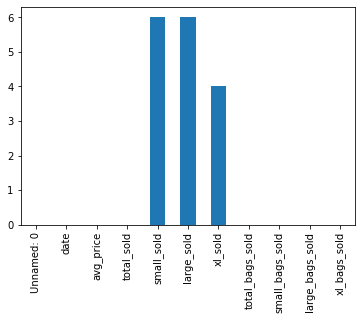

In [8]:
# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

### Removing Missing Values

|Method|Description|Link to Documentation|
|--------|--------|--------|
|```df.dropna()```|Remove missing values.|[.dropna Pandas Documentaiton](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)|


In [9]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

Unnamed: 0         False
date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool


### Replacing MIssing Values

|Method|Description|Link to Documentation|
|--------|--------|--------|
|```df.fillna()```|Fill NA/NaN values using the specified method.|[.fillna Pandas Documentaiton](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)|


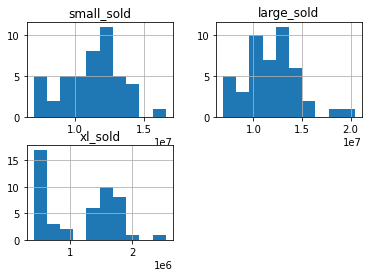

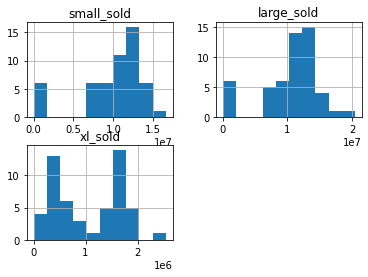

In [10]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Display the plot.
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Display the plot
plt.show()

# Creating Dataframes

### List of Dictionaries

In [11]:
# Create a list of dictionaries (by row) with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348}
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


### Dictionary of Lists

In [12]:
# Create a dictionary of lists (by column) with new data
avocados_dict = {
    "date": ["2019-11-17", "2019-12-01"],
    "small_sold": [10859987, 9291631],
    "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


# Reading and Writing CSVs

### CSV to Dataframe

In [13]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv("../datasets/airline_bumping.csv")

# Take a look at the DataFrame
print(airline_bumping.head())

# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()

# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

             airline  year  nb_bumped  total_passengers
0    DELTA AIR LINES  2017        679          99796155
1     VIRGIN AMERICA  2017        165           6090029
2    JETBLUE AIRWAYS  2017       1475          27255038
3    UNITED AIRLINES  2017       2067          70030765
4  HAWAIIAN AIRLINES  2017         92           8422734
                     nb_bumped  total_passengers  bumps_per_10k
airline                                                        
ALASKA AIRLINES           1392          36543121       0.380920
AMERICAN AIRLINES        11115         197365225       0.563169
DELTA AIR LINES           1591         197033215       0.080748
EXPRESSJET AIRLINES       3326          27858678       1.193883
FRONTIER AIRLINES         1228          22954995       0.534960
HAWAIIAN AIRLINES          122          16577572       0.073593
JETBLUE AIRWAYS           3615          53245866       0.678926
SKYWEST AIRLINES          3094          47091737       0.657015
SOUTHWEST AIRLINES      

### Dataframe to CSV

In [1]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv (modified destination due to runnning on local machine)
airline_totals_sorted.to_csv("../datasets/output/airline_totals_sorted.csv")

NameError: name 'airline_totals' is not defined